In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Step 1: Load the dataset (replace 'MMP.csv' with your actual file)
data = pd.read_csv('../Capstone/dataset_upstream.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No.            193 non-null    float64
 1   G_N2           193 non-null    float64
 2   G_CO2          193 non-null    float64
 3   G_H2S          193 non-null    float64
 4   G_C1           193 non-null    float64
 5   G_C2           193 non-null    float64
 6   G_C3           193 non-null    float64
 7   G_C4           193 non-null    float64
 8   G_C5           193 non-null    float64
 9   G_C6           193 non-null    float64
 10  G_C7+          193 non-null    float64
 11  TR (℃)         193 non-null    float64
 12  O_N2           193 non-null    float64
 13  O_CO2          193 non-null    float64
 14  O_C1           193 non-null    float64
 15  O_C2           193 non-null    float64
 16  O_C3           193 non-null    float64
 17  O_C4           193 non-null    float64
 18  O_C5      

In [4]:
data.columns = ["No","G_N2", "G_CO2", "G_H2S", "G_C1", "G_C2", "G_C3", "G_C4", "G_C5","G_C6","G_C7+", "TR(C)","O_N2", "O_CO2", "O_C1", "O_C2", "O_C3", "O_C4", "O_C5", "O_C6", "O_C7+","MWC7+(g/mol)","EM","MMP (mPa)","test1"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            193 non-null    float64
 1   G_N2          193 non-null    float64
 2   G_CO2         193 non-null    float64
 3   G_H2S         193 non-null    float64
 4   G_C1          193 non-null    float64
 5   G_C2          193 non-null    float64
 6   G_C3          193 non-null    float64
 7   G_C4          193 non-null    float64
 8   G_C5          193 non-null    float64
 9   G_C6          193 non-null    float64
 10  G_C7+         193 non-null    float64
 11  TR(C)         193 non-null    float64
 12  O_N2          193 non-null    float64
 13  O_CO2         193 non-null    float64
 14  O_C1          193 non-null    float64
 15  O_C2          193 non-null    float64
 16  O_C3          193 non-null    float64
 17  O_C4          193 non-null    float64
 18  O_C5          193 non-null    

In [5]:
# Assuming the data has features (input variables) and a target column 'MMP

data.drop(columns=["No","test1"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G_N2          193 non-null    float64
 1   G_CO2         193 non-null    float64
 2   G_H2S         193 non-null    float64
 3   G_C1          193 non-null    float64
 4   G_C2          193 non-null    float64
 5   G_C3          193 non-null    float64
 6   G_C4          193 non-null    float64
 7   G_C5          193 non-null    float64
 8   G_C6          193 non-null    float64
 9   G_C7+         193 non-null    float64
 10  TR(C)         193 non-null    float64
 11  O_N2          193 non-null    float64
 12  O_CO2         193 non-null    float64
 13  O_C1          193 non-null    float64
 14  O_C2          193 non-null    float64
 15  O_C3          193 non-null    float64
 16  O_C4          193 non-null    float64
 17  O_C5          193 non-null    float64
 18  O_C6          193 non-null    

In [6]:
data1 = data.dropna(subset=data.columns)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G_N2          193 non-null    float64
 1   G_CO2         193 non-null    float64
 2   G_H2S         193 non-null    float64
 3   G_C1          193 non-null    float64
 4   G_C2          193 non-null    float64
 5   G_C3          193 non-null    float64
 6   G_C4          193 non-null    float64
 7   G_C5          193 non-null    float64
 8   G_C6          193 non-null    float64
 9   G_C7+         193 non-null    float64
 10  TR(C)         193 non-null    float64
 11  O_N2          193 non-null    float64
 12  O_CO2         193 non-null    float64
 13  O_C1          193 non-null    float64
 14  O_C2          193 non-null    float64
 15  O_C3          193 non-null    float64
 16  O_C4          193 non-null    float64
 17  O_C5          193 non-null    float64
 18  O_C6          193 non-null    float

In [7]:
# Assuming the data has features (input variables) and a target column 'MMP'
# Ensure target variable is numeric
y = pd.to_numeric(data1["MMP (mPa)"], errors='coerce')

# Handle any categorical variables in X
X = pd.get_dummies(data1.drop("MMP (mPa)", axis=1), drop_first=True)


# Step3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
 
# Feature seleciton using RFE with Cross-validation
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=model_rf, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_scaled, y)
 
 
 
#Get the selected features and their ranking
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)
 

Selected Features:
Index(['G_N2', 'G_CO2', 'G_H2S', 'G_C1', 'G_C2', 'G_C3', 'G_C4', 'G_C5',
       'G_C7+', 'TR(C)', 'O_N2', 'O_CO2', 'O_C1', 'O_C2', 'O_C3', 'O_C4',
       'O_C6', 'O_C7+', 'MWC7+(g/mol)'],
      dtype='object')


In [8]:
print(X.columns)

Index(['G_N2', 'G_CO2', 'G_H2S', 'G_C1', 'G_C2', 'G_C3', 'G_C4', 'G_C5',
       'G_C6', 'G_C7+', 'TR(C)', 'O_N2', 'O_CO2', 'O_C1', 'O_C2', 'O_C3',
       'O_C4', 'O_C5', 'O_C6', 'O_C7+', 'MWC7+(g/mol)', 'EM'],
      dtype='object')


In [9]:
#selected features:
index= ['G_N2', 'G_CO2', 'G_H2S', 'G_C1', 'G_C2', 'G_C3', 'G_C4', 'G_C5',
       'G_C6', 'G_C7+', 'TR(C)', 'O_N2', 'O_CO2', 'O_C1', 'O_C2', 'O_C3',
       'O_C4', 'O_C5', 'O_C6', 'O_C7+', 'MWC7+(g/mol)', 'EM']
#Step 5 model training and cross validation with hyperparameter tuning
 
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
 
model_rf_tuned = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=model_rf_tuned, param_distributions=param_dist, n_iter=50, cv=5, scoring="neg_mean_squared_error", verbose=1, random_state=42)
rf_random.fit(X_scaled, y)
 
 
print("Best Hyperparameters:")
print(rf_random.best_params_)
 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}


/opt/anaconda3/envs/Python_AI/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [33]:
#Fitting 5 folds for each of 50 candidates, totalling 250 fits
#Best Hyperparameters:
#{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
 
# Step 6: Model Evaluation on Testing Set
X_selected = rfecv.transform(X_scaled)
print(X_selected.columns)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
 
model_rf_tuned_best = RandomForestRegressor(**rf_random.best_params_, random_state=42)
model_rf_tuned_best.fit(X_train, y_train)
y_test_pred = model_rf_tuned_best.predict(X_test)
 
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
 
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")
print(f"R-squared (R2) Score on Test Set: {r2_test}")
 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [46]:
#step 7: Taylor Daigram
def plot_taylor_diagram(y_true, y_pred, title):
  corr_coef = np.corrcoef(y_true, y_pred)[0, 1]
  std_obs = np.std(y_true)
  std_model = np.std(y_pred)
 
  plt.figure(figsize=(8, 8))
  plt.scatter(std_obs, corr_coef, color="b", marker="o", label="Model")
  plt.plot([0, std_obs], [corr_coef, corr_coef], "b--", label="Correlation")
  plt.plot([std_obs, std_obs], [0, corr_coef], "b--")
  plt.plot([0, std_obs], [0, corr_coef], "b--")
 
  plt.scatter(std_model, corr_coef, color="r", marker="o", label="Observations")
  plt.plot([0, std_model], [corr_coef, corr_coef], "r--", label="Correlation")
  plt.plot([std_model, std_model], [0, corr_coef], "r--")
  plt.plot([0, std_model], [0, corr_coef], "r--")
 
 
 
  plt.xlabel("Standard Deviation of Observations")
  plt.ylabel("Correlation Coefficient")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()





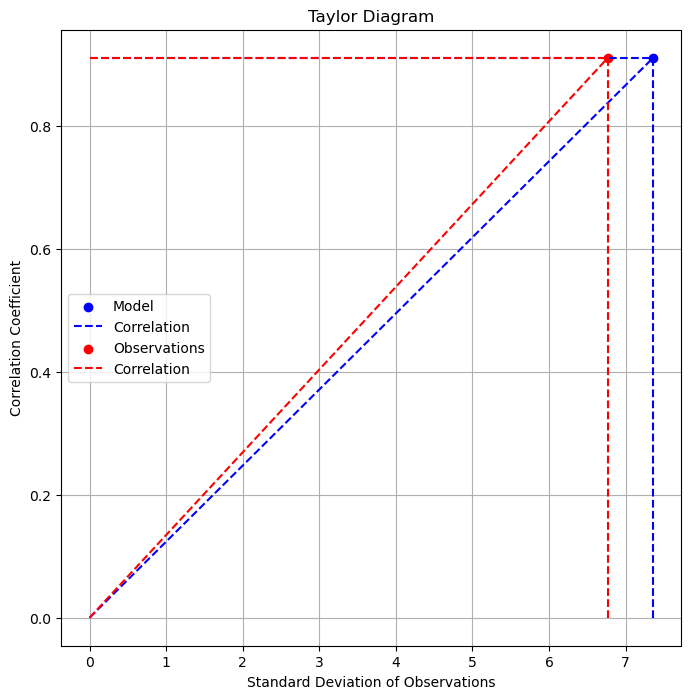

In [48]:

# Step 3: Make predictions
predictions = model_rf_tuned_best.predict(X_test)

# Step 4: Plot the Taylor diagram
plot_taylor_diagram(y_test, predictions, title="Taylor Diagram")


/var/folders/99/v13kddbs2xj4qq601p4wtg9w0000gn/T/ipykernel_34247/3221938528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features, y=feature_importances, palette='viridis')


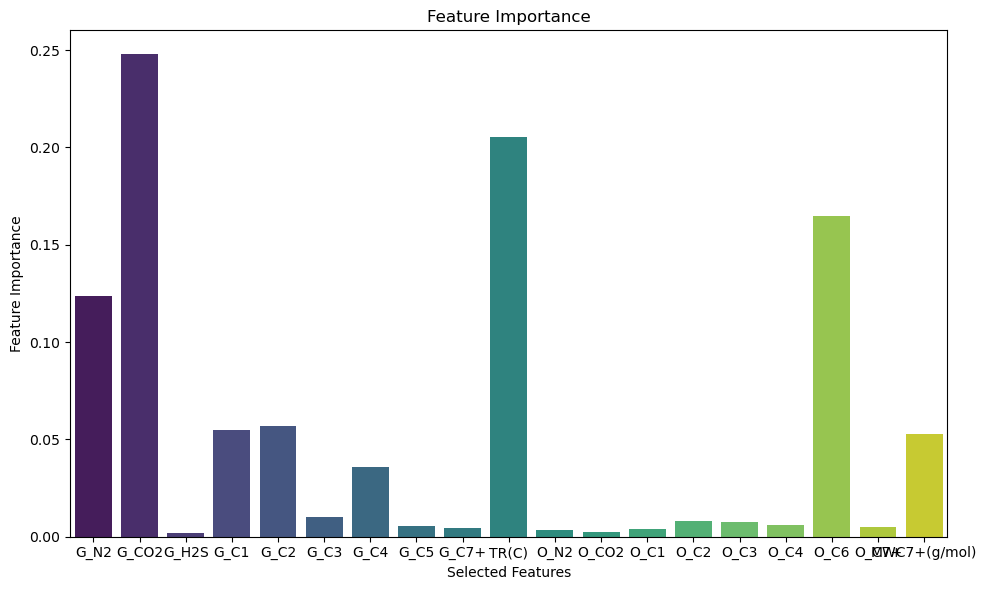

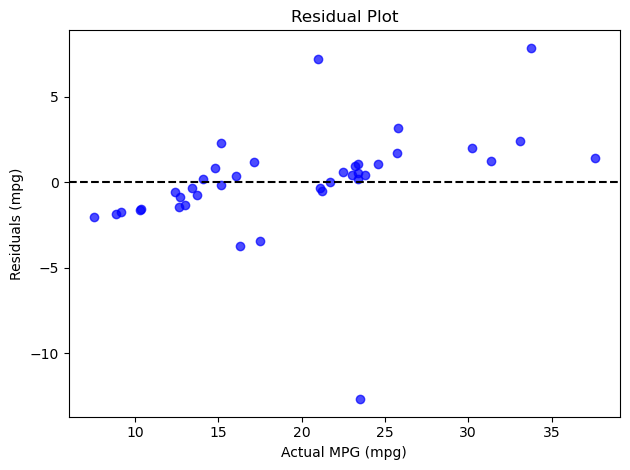

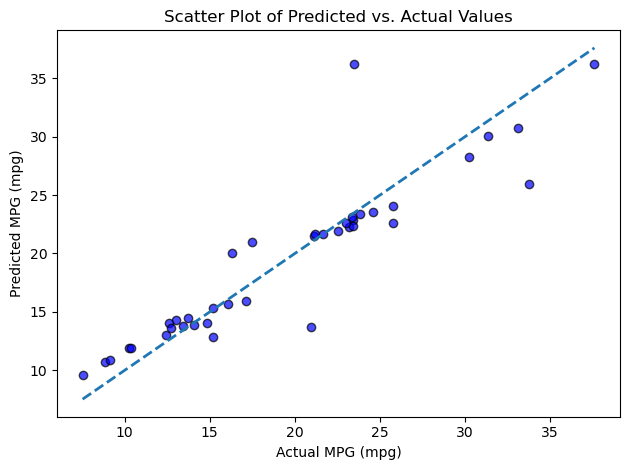

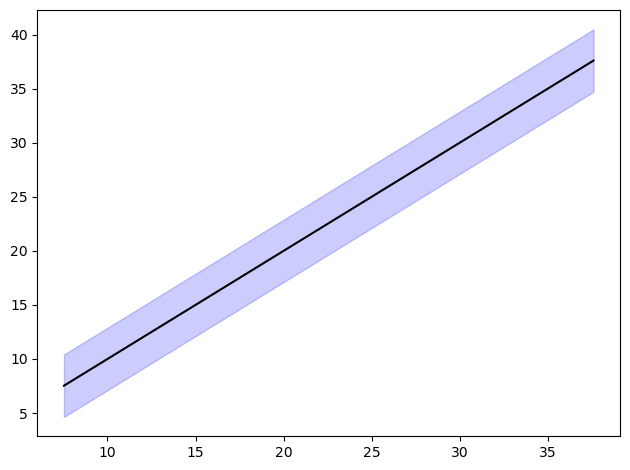

In [15]:
#Visualization of reports
 
 
# Feature Importances Plot
feature_importances = model_rf_tuned_best.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=feature_importances, palette='viridis')
plt.xlabel("Selected Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
 
# Residual Plot
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Actual MPG (mpg)")
plt.ylabel("Residuals (mpg)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()
 
# Scatter Plot of Predicted vs. Actual Values with Confidence Interval
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", linewidth=2)
plt.xlabel("Actual MPG (mpg)")
plt.ylabel("Predicted MPG (mpg)")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.tight_layout()
plt.show()
 
# Residuals +/- 1 standard deviation of residuals
std_residuals = np.std(residuals)
 
# Plot confidence zone around the fitted line
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line
y_upper = y_line + 0.95 * std_residuals
y_lower = y_line - 0.95 * std_residuals
plt.plot(x_line, y_line, color='k')
plt.fill_between(x_line, y_lower, y_upper, alpha=0.2, color='b')
plt.tight_layout()
plt.show()